#  TaiChung DE Plant PV Forecast AR Model

Try AR model to forecast.


In [2]:
# import module
import pandas as pd
from pandas import concat
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load data
data = pd.read_csv('data\\Taichung_DE_WUQI_sun4.csv',encoding='utf-8-sig')
data = data.rename(columns={'Unnamed: 0':'time'})
print(data.head())
print(data.info()) # look data information 

             time  StnPres  SeaPres  Temperaure  Td dew point  RH   WS     WD  \
0  2016/1/1 06:00   1021.4   1024.6        14.8          11.3  80  3.0   10.0   
1  2016/1/1 07:00   1022.1   1025.3        14.6          11.4  81  2.9   20.0   
2  2016/1/1 08:00   1022.7   1025.9        15.8          12.1  79  3.0   10.0   
3  2016/1/1 09:00   1023.2   1026.4        18.3          13.1  72  2.5  350.0   
4  2016/1/1 10:00   1023.0   1026.2        19.2          13.3  69  5.5  350.0   

   WSGus  WDGus  ...  SunShine  GloblRad  Visb  UVI  Cloud Amount  power(KWH)  \
0    6.8     20  ...       0.0      0.00   NaN  NaN           NaN         NaN   
1    5.7     20  ...       0.0      0.00   NaN  NaN           NaN         NaN   
2    5.1    360  ...       0.7      0.30  10.0  NaN           6.0       146.0   
3    6.5     30  ...       1.0      0.89  12.0  NaN           5.0       444.0   
4    8.1    350  ...       1.0      1.52   NaN  NaN           NaN       680.0   

   solarirrandance  month 

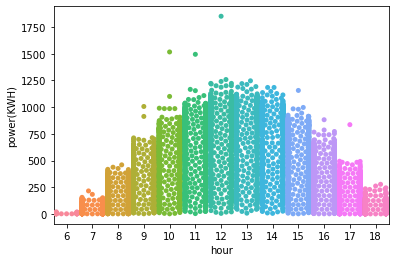

In [4]:
power_data = data.loc[:,['power(KWH)','hour']].dropna()
plt.figure()
sns.swarmplot(x='hour',y='power(KWH)',data=power_data)

In [5]:
power_value = power_data['power(KWH)']
power_value_corr = concat([power_value.shift(1), power_value], axis=1)
power_value_corr.columns = ['t-1', 't']
result = power_value_corr.corr()
print(result)

         t-1        t
t-1  1.00000  0.83395
t    0.83395  1.00000


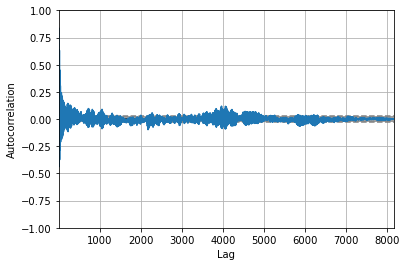

In [34]:
plt.figure()
autocorrelation_plot(power_value)


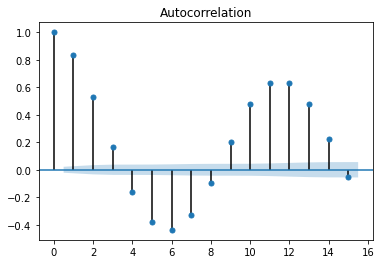

<Figure size 432x288 with 0 Axes>

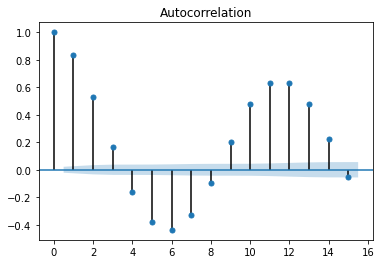

In [35]:
plt.figure()
plot_acf(power_value, lags=15)

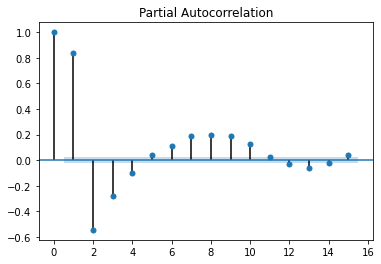

<Figure size 432x288 with 0 Axes>

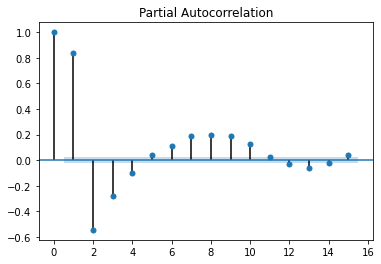

In [36]:
plt.figure()
plot_pacf(series, lags=15)

In [ ]:

plt.figure()

X = series.values
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
train, test = X[:train_size], X[train_size:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=10,maxiter=100,tol=1e-5)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

print(model_fit.information)